Запишем нашу функцию $y''(x) + p(x)y' + q(x)y = f(x)$

$y'(0) = \frac{4}{3} $
<br/>
y(0) = 0
<br/>
$y_0 = sin(sh(x)) + \frac{x}{3}$

$p(x) = - th(x)$
<br/>
$q(x) = ch^2(x)$
<br/>
$ f(x) = \frac{xch^2(x)-th(x)}{3}$

---

Перепишем ДУ в виде $y''(x) + p(x)y' + q(x)y = f(x)$

$y''(x)=-p(x)y'-q(x)y+f(x)$

---

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import math

In [2]:
def p(x):
    return (-1) * np.tanh(x)
def q(x):
    return np.cosh(x) ** 2
def f(x):
    return ((np.cosh(x) ** 2) * x - np.tanh(x)) / 3
def secDerriative(x, y, z):
    return (-1) * p(x) *  z + (-1) * q(x) * y + f(x) 

In [3]:
def Euler(n, h, x = 0, y = 0 , yDerriative = 4/3):
    for i in range(n):
        yDerriative += h * secDerriative(x, y, yDerriative)
        y += h * yDerriative
        x += h
    return y, yDerriative

In [4]:
def RungeCute(n, h, x, y, yDerriative):
    for i in range(n):
        q1 = secDerriative(x, y, yDerriative)
        k1 = yDerriative
        
        q2 = secDerriative(x + h/2, y + h * k1 / 2, yDerriative + h * q1 / 2)
        k2 = yDerriative + q1 * h / 2
        
        q3 = secDerriative(x + h/2, y + h * k2 / 2, yDerriative + h * q2 / 2)
        k3 = yDerriative + q2 * h / 2
        
        q4 = secDerriative(x + h, y + h * k3, yDerriative + h * q3)
        k4 = yDerriative + q3 * h
        
        yDerriative += h * (q1 + 2*q2 + 2*q3 + q4) / 6
        y += h * (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h
        
    return y, yDerriative

In [5]:
def CorrRungeCute(n, h, x, y, yDerriative):
    
    ycalcSol1, ycalcSol1Derr  = RungeCute(n, h, x, y, yDerriative)
    ycalcSol2, ycalcSol2Derr = RungeCute(n * 2, h / 2, x, y, yDerriative)
    yres = ycalcSol2 + (ycalcSol2 - ycalcSol1) / 15
    yresDerr = ycalcSol2Derr + (ycalcSol2Derr - ycalcSol1Derr) / 15
    
    return yres, yresDerr

In [6]:
def Adams(n, h, x, y, yDerriative):
    y1, yDerriative1 = RungeCute(1, h, x, y, yDerriative)
    y2, yDerriative2 = RungeCute(2, h, x, y, yDerriative)

    if n == 0:
        return y, yDerriative
    if n == 1:
        return y1, yDerriative1
    if n == 2:
        return y2, yDerriative2

    for i in range(n - 2):
        q3 = 5 * secDerriative(x, y, yDerriative)
        q2 = (-16) * secDerriative(x + h, y1, yDerriative1)
        q1 = 23 * secDerriative(x + 2 * h, y2, yDerriative2)

        k3 = 5 * yDerriative
        k2 = (-16) * yDerriative1
        k1 = 23 * yDerriative2

        yDerriative = yDerriative1
        yDerriative1 = yDerriative2
        yDerriative2 += h * (q1 + q2 + q3) / 12

        y = y1
        y1 = y2
        y2 += h * (k1 + k2 + k3) / 12

        x += h
    return y2, yDerriative2

In [7]:
def Solution(x):
    return np.sin(np.sinh(x)) + (x / 3)

In [8]:
x0 = 0
y0 = 0
yDerriative0 = 4/3
xBegin = 0
xEnd = 1

h = 0.05

In [9]:
# X = [x0 + i/1000 for i in range(1000)]
X = [x0 + i * h for i in range(21)]
Solutions = [Solution(x) for x in X]

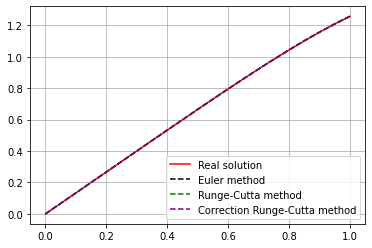

In [10]:
X = [x0 + i * h for i in range(21)]
Solutions = [Solution(x) for x in X]
plt.plot(X, Solutions, color="red", label="Real solution")

X = [x0 + i * h for i in range(21)]
EulerSolutions = []
for i in range(21):
    EulerSolution, yEulerDer = Euler(i, h, x0, y0, yDerriative0)
    EulerSolutions.append(EulerSolution)
plt.plot(X, EulerSolutions, linestyle="--", color="black", label="Euler method")

RungeSolutions = []
for i in range(21):
    yRunge, yRungeDer = RungeCute(i, h, x0, y0, yDerriative0)
    RungeSolutions.append(yRunge)
plt.plot(X, RungeSolutions, linestyle="--", color="green", label="Runge-Cutta method")

CorrRungeSol = []
for i in range(21):
    yRungeCorr, yRungeDerCorr = CorrRungeCute(i, h, x0, y0, yDerriative0)
    CorrRungeSol.append(yRungeCorr)
plt.plot(X, CorrRungeSol, linestyle="--", color="purple", label="Correction Runge-Cutta method")


#Ye = [abs(Y[i] - Yr[i]) for i in range(1000)]
#plt.plot(X, Ye, label="Error")

plt.legend(loc="lower right")
plt.grid(True)

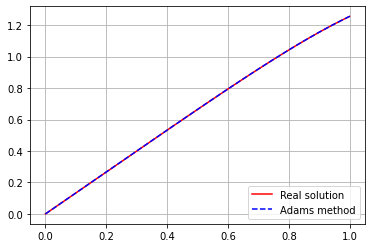

In [11]:
X = [x0 + i / 1000 for i in range(1000)]
Solutions = [Solution(i) for i in X]
plt.plot(X, Solutions, color="red", label="Real solution")

X = [x0 + i * h for i in range(21)]
AdamsScore = [] 
for i in range(21):
    yAdams, yAdamsDer = Adams(i, h, x0, y0, yDerriative0)
    AdamsScore.append(yAdams)
plt.plot(X, AdamsScore, linestyle="--", color="blue", alpha=1, label="Adams method")

plt.legend(loc="lower right")
plt.grid(True)

In [295]:
def error(method, x = 0, y = 0, yDerriative = 4/3):
    hlog = []
    methodlog = []
    for n in range(20, 300, 50):
        X = np.linspace(0,1,n+1)
        h = 1/n
        hlog.append(np.log(h))
        deltas = []
        for i in range(n):
            y, yDer = method(i, h, x, y, yDerriative)
            delta = abs(y - Solution(x + i * h))
            deltas.append(delta)
        maxdelta = np.max(deltas)
        methodlog.append(np.log(maxdelta))
    return hlog, methodlog
            

In [29]:
def logEr(method):
    H = []
    erY = []
    for n in range(10, 300, 50):
        h = (1 - 0) / n
        X = np.linspace(0, 1, n + 1)
        Y, Yder = method(n, h, x = x0 , y = y0 , yDerriative = yDerriative0)
        tmp = abs(Y - Solution(X[-1]))
#         print(tmp)
        if tmp == 0.0:
            erY.append(np.log(3.4416913763379853e-15))
#             erY.append()
#             erY.append((-34.13833574206902))
        else:
            erY.append(tmp)
        H.append(np.log(h))
    return H, erY

In [13]:
hlogE, methodlogE = logEr(Euler)

No handles with labels found to put in legend.


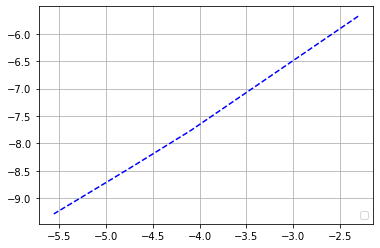

In [14]:
plt.plot(hlogE, methodlogE, linestyle = "--", color="blue", alpha=1, label="")

plt.legend(loc="lower right")
plt.grid(True)

In [24]:
hlogR, methodlogR = logEr(RungeCute)

In [25]:
methodlogR

[3.6669236069819533e-07,
 3.2297364782607474e-10,
 2.87285750744104e-11,
 6.426414955740256e-12,
 2.1678214778830807e-12,
 9.228173780684301e-13]

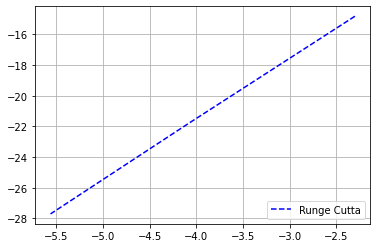

In [17]:
plt.plot(hlogR, methodlogR, linestyle = "--", color="blue", alpha=1, label="Runge Cutta")

plt.legend(loc="lower right")
plt.grid(True)

In [22]:
hlogCR, methodlogCR = logEr(CorrRungeCute)

In [23]:
methodlogCR

[2.499640716635554e-09,
 1.13464793116691e-13,
 5.551115123125783e-15,
 -33.30281336519195,
 1.3322676295501878e-15,
 6.661338147750939e-16]

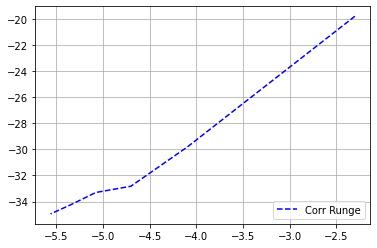

In [21]:
plt.plot(hlogCR, methodlogCR, linestyle = "--", color="blue", alpha=1, label="Corr Runge")

plt.legend(loc="lower right")
plt.grid(True)

In [31]:
hlogA, methodlogA = logEr(Adams)

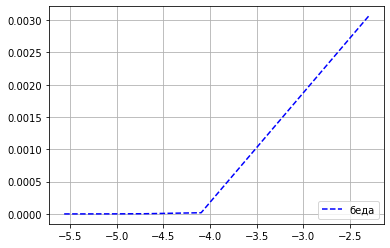

In [32]:
plt.plot(hlogA, methodlogA, linestyle = "--", color="blue", alpha=1, label="беда")

plt.legend(loc="lower right")
plt.grid(True)

In [28]:
methodlogA

[0.0030588193563394483,
 1.861529160906983e-05,
 3.0897806237994985e-06,
 1.0124388625243341e-06,
 4.4973692592265024e-07,
 2.3760442902087675e-07]